<a href="https://colab.research.google.com/github/msilver22/data_augmentation/blob/main/photos/Sapienza_logos/Logos_sapienza_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
from PIL import Image
from io import BytesIO

image_url = 'https://github.com/msilver22/data_augmentation/blob/7943af5d24dfa931742360f33ef507dd931820bc/photos/Sapienza_logos/original_logo.png?raw=true'

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

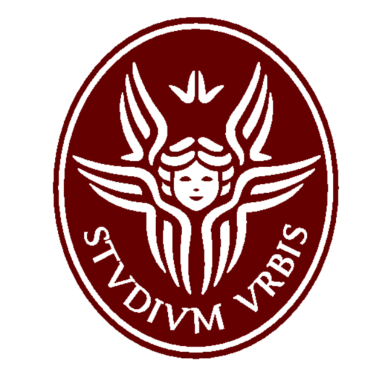

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()


In [8]:
import numpy as np

print(img.size)
print(img.format)
print(img.mode)

img_array = np.array(img)
print(img_array[300,230:240])


(639, 640)
PNG
RGB
[[101   0   0]
 [101   0   0]
 [101   0   0]
 [101   0   0]
 [153  86  86]
 [214 187 187]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


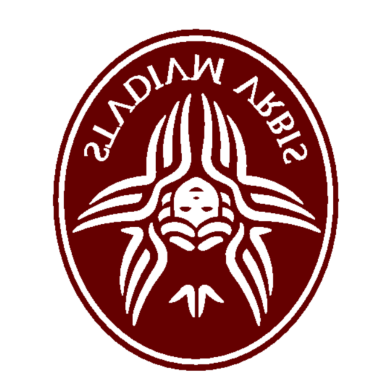

----------------------------------------------


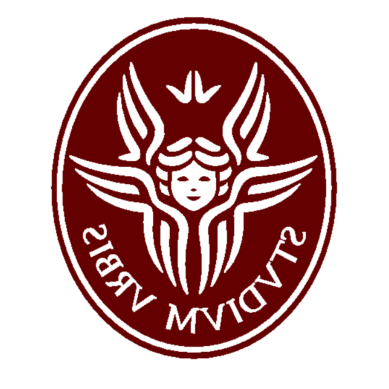

In [14]:
import matplotlib.pyplot as plt

# Vertical Flipping
img_flip_v = img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(img_flip_v)
plt.axis('off')
plt.show()

print("----------------------------------------------")

# Horizontal Flipping
img_flip_o = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(img_flip_o)
plt.axis('off')
plt.show()


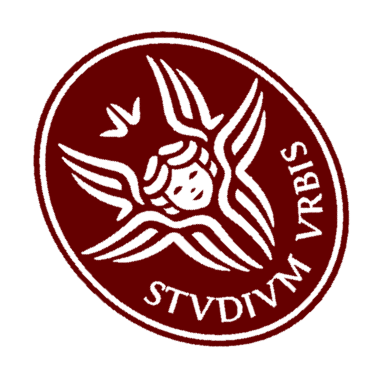

In [16]:
# Rotation
img_rotated = img.rotate(45, fillcolor='white')
plt.imshow(img_rotated)
plt.axis('off')
plt.show()


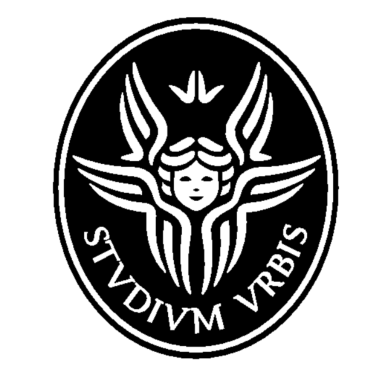

----------------------------------------------


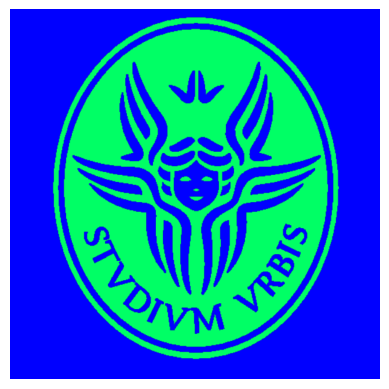

----------------------------------------------


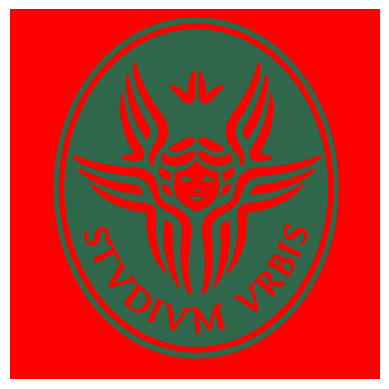

In [19]:
# RGB->Gray-scale
img_grayscale = img.convert('L')
plt.imshow(img_grayscale, cmap="gray")
plt.axis('off')
plt.show()

print("----------------------------------------------")

# RGB->HSV
img_hsv = img.convert('HSV')
plt.imshow(np.asarray(img_hsv))
plt.axis('off')
plt.show()

print("----------------------------------------------")

# RGB->LAB
from skimage import color
img_lab = color.rgb2lab(img)
img_lab_norm = (img_lab - img_lab.min()) / (img_lab.max() - img_lab.min())
plt.imshow(img_lab_norm)
plt.axis('off')
plt.show()

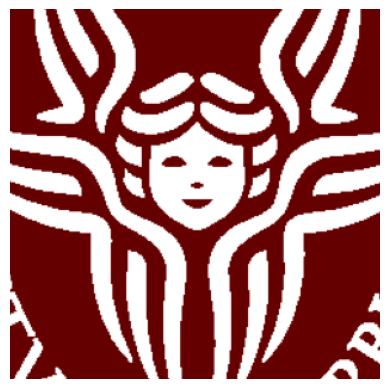

In [21]:
# Cropping
top_left_x = 170
top_left_y = 170
bottom_right_x = 470
bottom_right_y = 470

img_cropped = img.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
plt.imshow(img_cropped)
plt.axis('off')
plt.show()


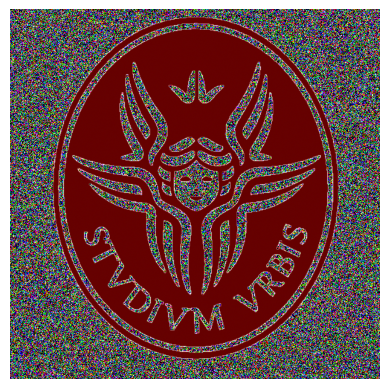

In [22]:
# Noise injection
def add_noise(img):
  img_array = np.array(img)
  noise = np.random.randint(0, 3, img_array.shape, dtype=np.uint8)
  noisy_img_array = img_array + noise
  noisy_img_array = np.clip(noisy_img_array, 0, 255)
  noisy_img = Image.fromarray(noisy_img_array.astype(np.uint8))
  return noisy_img

noisy_img = add_noise(img)
plt.imshow(noisy_img)
plt.axis('off')
plt.show()


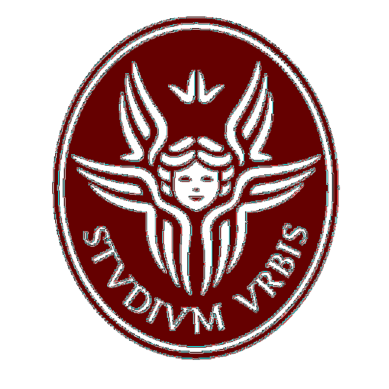

----------------------------------------------


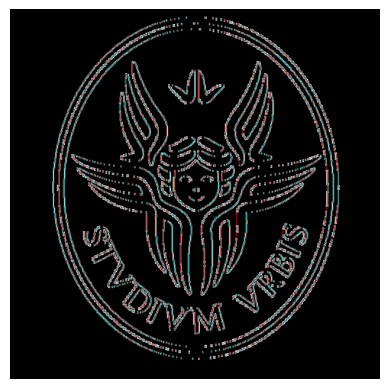

----------------------------------------------


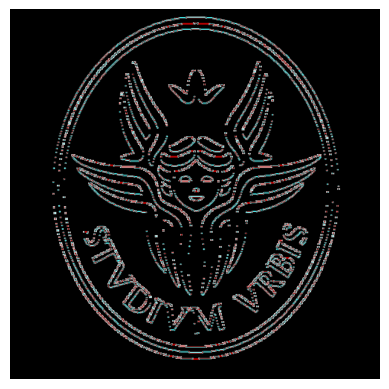

----------------------------------------------


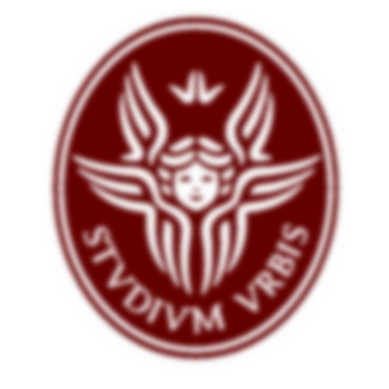

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image
from scipy.ndimage import gaussian_filter

kernel_emboss = np.array([[-2,-1, 0],
                          [-1, 1, 1],
                          [ 0, 1, 2]])
kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
kernel_sobel_y = np.array([[-1,-2,-1],
                           [ 0, 0, 0],
                           [ 1, 2, 1]])


img_array = np.array(img)

img_embossed = np.zeros_like(img_array)
img_outlined_x = np.zeros_like(img_array)
img_outlined_y = np.zeros_like(img_array)
img_gaussian_blur = np.zeros_like(img_array)

for i in range(3): # Assuming RGB image
    img_embossed[:, :, i] = ndimage.convolve(img_array[:, :, i], kernel_emboss, mode='reflect')
    img_outlined_x[:, :, i] = ndimage.convolve(img_array[:, :, i], kernel_sobel_x, mode='reflect')
    img_outlined_y[:, :, i] = ndimage.convolve(img_array[:, :, i], kernel_sobel_y, mode='reflect')
    img_gaussian_blur[:,:,i] = gaussian_filter(img_array[:,:,i], sigma=5)




plt.imshow(img_embossed)
plt.axis('off')
plt.show()

print("----------------------------------------------")

plt.imshow(img_outlined_x)
plt.axis('off')
plt.show()

print("----------------------------------------------")

plt.imshow(img_outlined_y)
plt.axis('off')
plt.show()

print("----------------------------------------------")

plt.imshow(img_gaussian_blur)
plt.axis('off')
plt.show()

#TO DO

*   Random erasing
*   Mixing images

